In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
data = pd.DataFrame(pd.read_csv('../day5/data/day5_assign_machine_failure_dataset.csv'))
data.head()

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


In [11]:
x = data[['Height_cms','Weight_kgs']]
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = data['T_Shirt_Size']

In [12]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x,y)

KNeighborsClassifier()

In [13]:
x_pred = [[161, 63]]
x_pred_sc = scaler.transform(x_pred)
y_pred = model.predict(x_pred_sc)
h = x_pred[0][0]
w = x_pred[0][1]
s = y_pred[0]
print(f"K = {k}")
print(f'Height: {h}, Weight: {w}, T-shirt size => {s}')
print('Accuracy','{:.2f}'.format(model.score(x,y)))

K = 5
Height: 161, Weight: 63, T-shirt size => L
Accuracy 1.00


c:\Users\User\Documents\sut_ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
fruit_data = pd.read_excel('../day5/data/knn_fruit_data.xlsx')
fruit_data.head()

,width,height,mass,color_score,fruit_name
0,8.4,7.3,192,0.55,apple
1,6.2,4.7,86,0.80,mandarin
2,6.0,4.6,84,0.79,mandarin
3,8.0,6.8,180,0.59,apple
4,7.4,7.2,176,0.60,apple


In [15]:
x = fruit_data[['width', 'height', 'mass', 'color_score']]
y = fruit_data['fruit_name']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# scaling after splitting
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Training model 
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
x_pred = [[7.5, 7.5, 175, 0.75]]
x_pred_sc = scaler.transform(x_pred)
y_pred = model.predict(x_pred_sc)
w = x_pred[0][0]
h = x_pred[0][1]
m = x_pred[0][2]
c = x_pred[0][3]
f = y_pred[0]
print('K =', k)
print('Prediction:')
print(f'width: {w}, height: {h}, mass: {m}, ', end='')
print(f'color score {c} => fruit: {f}')
print()
print('Accuracy:', '{:.2f}'.format(model.score(x_test, y_test)))

K = 5
Prediction:
width: 7.5, height: 7.5, mass: 175, color score 0.75 => fruit: orange

Accuracy: 0.93


c:\Users\User\Documents\sut_ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


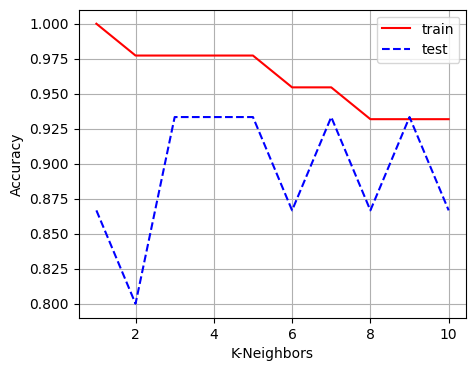

In [19]:
acc_train = []
acc_test = []
n = range(1,11)

for k in n:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    acc_train.append(model.score(x_train, y_train))
    acc_test.append(model.score(x_test, y_test))

plt.figure(figsize=(5,4))
plt.plot(n, acc_train, 'r-', label='train')
plt.plot(n, acc_test, 'b--', label='test')
plt.xlabel('K-Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='best')